In [9]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose as mlrose_old
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import time

from mlrose_hiive.algorithms.decay import GeomDecay


#Random State
rs = 614

In [6]:
pip install mlrose_hiive

Note: you may need to restart the kernel to use updated packages.


In [11]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']


In [50]:
def rhc(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.random_hill_climb(problem_fit, max_attempts=100, max_iters= max_iters, restarts=10, random_state = rs)[1]
    return [max_iters, "random_hill_climb", problem_name,fitness_score, time.time()-start]

def sa(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.simulated_annealing(problem_fit, max_attempts=100, max_iters= max_iters, random_state = rs)[1]
    return [max_iters, "simulated_annealing", problem_name,fitness_score, time.time()-start]

def ga(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose.genetic_alg(problem_fit, max_attempts=100, max_iters= max_iters, pop_size= 300, mutation_prob=0.1, random_state = rs)[1]
    return [max_iters, "genetic_alg", problem_name,fitness_score, time.time()-start]

def mimic(problem_fit, problem_name, max_iters= 100):
    start = time.time()
    fitness_score = mlrose_old.mimic(problem_fit, pop_size=300, keep_pct=0.2, max_attempts=10, max_iters=max_iters, curve=False, random_state=rs, fast_mimic=True)[1]
    return [max_iters, "mimic", problem_name,fitness_score, time.time()-start]

fitness = mlrose.FlipFlop()
results = []
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
problems_name = ["Flip Flop", "One Max", "Max-K Color"]

fitness_functions = [mlrose.FlipFlop(), mlrose.OneMax(), mlrose.MaxKColor(edges)]

problems = [mlrose.DiscreteOpt(length = 200, fitness_fn = fitness_function, maximize=True, max_val = 2) for fitness_function in fitness_functions]
for j in range(len(problems)):
    for i in range(0, 10000, 500):
        results.append(rhc(problems[j], problems_name[j], max_iters= i))
        results.append(sa(problems[j], problems_name[j], max_iters= i))
        results.append(ga(problems[j], problems_name[j], max_iters= i))
        results.append(mimic(problems[j], problems_name[j], max_iters= i))
        print(i, end=" ")

0 500 1000 

KeyboardInterrupt: 

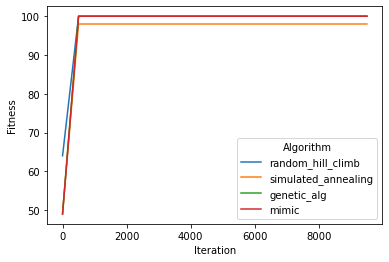

In [20]:
df = pd.DataFrame(results, columns=["Iteration", "Algorithm", "Problem","Fitness", "Time"])
sns.lineplot(data=df[df['Problem']==problems_name[1]], x="Iteration", y="Fitness", hue="Algorithm")
df.to_csv("problems_solution.csv", index=False)

In [46]:
print(df[df['Problem']== 'Flip Flop'].to_string())

    Iteration            Algorithm    Problem  Fitness       Time
0           0    random_hill_climb  Flip Flop     58.0   0.001992
1           0  simulated_annealing  Flip Flop     47.0   0.000000
2           0          genetic_alg  Flip Flop     47.0   0.034883
3           0                mimic  Flip Flop     47.0   0.033891
4         500    random_hill_climb  Flip Flop     85.0   0.507497
5         500  simulated_annealing  Flip Flop     92.0   0.101750
6         500          genetic_alg  Flip Flop     90.0   8.537515
7         500                mimic  Flip Flop     91.0  48.077078
8        1000    random_hill_climb  Flip Flop     85.0   0.530226
9        1000  simulated_annealing  Flip Flop     94.0   0.197340
10       1000          genetic_alg  Flip Flop     90.0   8.622371
11       1000                mimic  Flip Flop     91.0  48.939361
12       1500    random_hill_climb  Flip Flop     85.0   0.514276
13       1500  simulated_annealing  Flip Flop     96.0   0.278069
14       1

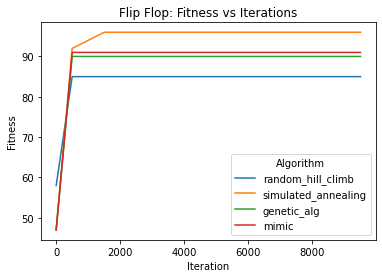

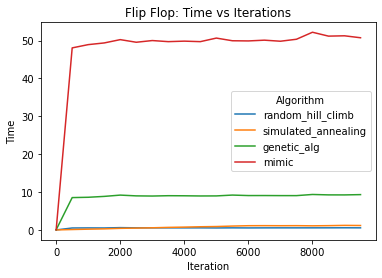

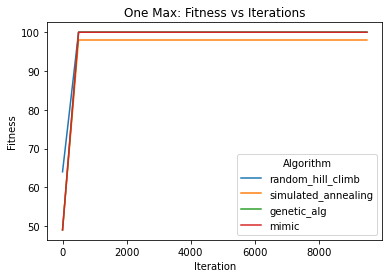

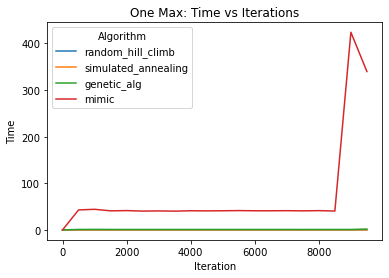

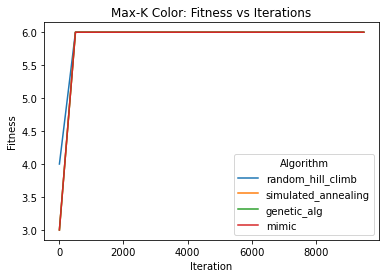

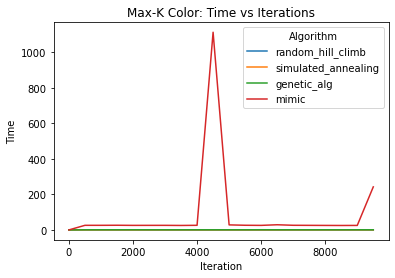

In [22]:
import matplotlib.pyplot as plt

for problem in problems_name:
  plt.figure()
  sns.lineplot(data=df[df['Problem']==problem], x="Iteration", y="Fitness", hue="Algorithm").set_title(problem+ ": Fitness vs Iterations")
  plt.figure()
  sns.lineplot(data=df[df['Problem']==problem], x="Iteration", y="Time", hue="Algorithm").set_title(problem+  ": Time vs Iterations")

In [23]:
df.groupby(['Algorithm', 'Problem'])['Fitness'].max()


Algorithm            Problem    
genetic_alg          Flip Flop       90.0
                     Max-K Color      6.0
                     One Max        100.0
mimic                Flip Flop       91.0
                     Max-K Color      6.0
                     One Max        100.0
random_hill_climb    Flip Flop       85.0
                     Max-K Color      6.0
                     One Max        100.0
simulated_annealing  Flip Flop       96.0
                     Max-K Color      6.0
                     One Max         98.0
Name: Fitness, dtype: float64

In [25]:
df.groupby(['Algorithm', 'Problem'])['Time'].max()


Algorithm            Problem    
genetic_alg          Flip Flop         9.361075
                     Max-K Color       1.031154
                     One Max           1.921737
mimic                Flip Flop        52.210182
                     Max-K Color    1113.721616
                     One Max         424.023379
random_hill_climb    Flip Flop         0.606262
                     Max-K Color       0.023962
                     One Max           0.081294
simulated_annealing  Flip Flop         1.196040
                     Max-K Color       0.144747
                     One Max           0.008058
Name: Time, dtype: float64

In [47]:
df[df['Problem']=='Flip Flop'].groupby(['Algorithm', 'Problem'])['Fitness'].mean()


Algorithm            Problem  
genetic_alg          Flip Flop    87.85
mimic                Flip Flop    88.80
random_hill_climb    Flip Flop    83.65
simulated_annealing  Flip Flop    93.25
Name: Fitness, dtype: float64

In [48]:
df[df['Problem']=='One Max'].groupby(['Algorithm', 'Problem'])['Fitness'].mean()


Algorithm            Problem
genetic_alg          One Max    97.45
mimic                One Max    97.45
random_hill_climb    One Max    98.20
simulated_annealing  One Max    95.55
Name: Fitness, dtype: float64

In [49]:
df[df['Problem']=='Max-K Color'].groupby(['Algorithm', 'Problem'])['Fitness'].mean()


Algorithm            Problem    
genetic_alg          Max-K Color    5.85
mimic                Max-K Color    5.85
random_hill_climb    Max-K Color    5.90
simulated_annealing  Max-K Color    5.85
Name: Fitness, dtype: float64